In [1]:
! pip install xgboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("ops.csv") 

# Drop rows where target is NaN or 'BARE'
df = df.dropna(subset=['VARIETY'])
df = df[df['VARIETY'] != 'BARE']

# Features
features = ['RF', 'ET', 'MAX', 'MIN', 'MTMP', 'RH1', 'RH2']
X = df[features]

# Target
y = df['VARIETY'].astype(str)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Number of samples after filtering:", len(y_encoded))


Number of samples after filtering: 433


In [21]:
# Scale features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

In [23]:
model = RandomForestClassifier(n_estimators=200, random_state=42)


In [24]:
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))


Accuracy: 0.7931034482758621
                     precision    recall  f1-score   support

             FRENCH       0.81      0.50      0.62        26
           SOYABEAN       0.92      1.00      0.96        22
SOYABEANPHULEAGRANI       1.00      0.87      0.93        15
              WHEAT       0.62      0.88      0.72        24

           accuracy                           0.79        87
          macro avg       0.84      0.81      0.81        87
       weighted avg       0.82      0.79      0.79        87



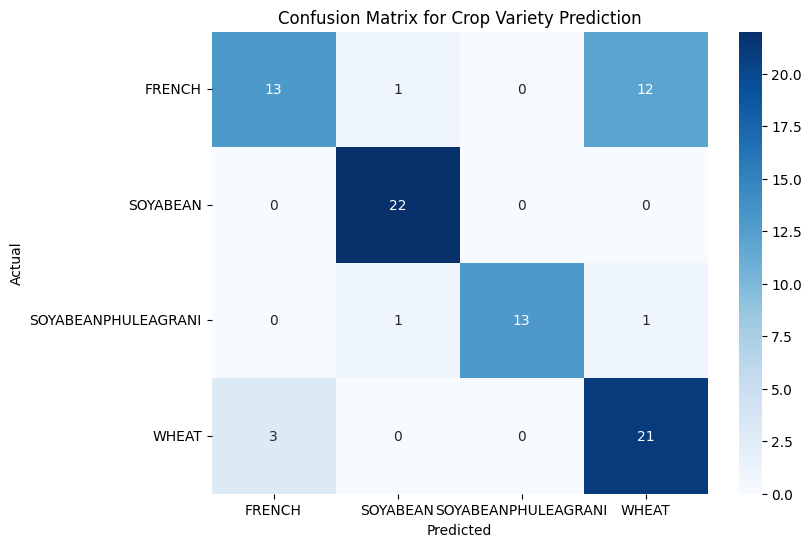

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class names
class_names = [str(c) for c in le.classes_]

# Plot confusion matrix as heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Crop Variety Prediction")
plt.show()


In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from fastai.tabular.all import *
cont_names = ['RF', 'ET', 'MAX', 'MIN', 'MTMP', 'RH1', 'RH2']
y_name = 'VARIETY'

# Split data
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))
dls = TabularDataLoaders.from_df(df, path='.', procs=[Categorify, FillMissing, Normalize],
                                 cont_names=cont_names, y_names=y_name, splits=splits)
# Create learner
learn = tabular_learner(dls, metrics=accuracy)

# Train model
learn.fit_one_cycle(5)

# Export the model
learn.export('crop_variety_model.pkl')

epoch,train_loss,valid_loss,accuracy,time
0,1.290185,1.341031,0.534884,00:00
1,1.067325,1.196810,0.627907,00:00
2,0.903431,1.038380,0.616279,00:00
3,0.841675,0.918844,0.627907,00:00
4,0.771336,0.833701,0.639535,00:00


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("ops.csv")

# Drop rows where crop is missing
df = df.dropna(subset=["VARIETY"])
# Select features
features = ["RF", "ET", "MAX", "MIN", "MTMP", "RH1", "RH2"]
X = df[features].fillna(0)    # replace NaN with 0
y = df["VARIETY"]

print("Dataset size:", X.shape, y.shape)

Dataset size: (1324, 7) (1324,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [51]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib  # For saving model

# Load dataset
df = pd.read_csv("ops.csv")

# Drop rows where crop (VARIETY) is missing
df = df.dropna(subset=['VARIETY'])
df = df[df['VARIETY'] != 'BARE']
# Select features
features = ["RF", "ET", "MAX", "MIN", "MTMP", "RH1", "RH2"]
X = df[features].fillna(0)  # replace NaN with 0

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["VARIETY"])

print("Classes:", label_encoder.classes_)  # Shows mapping

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train RandomForest
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# -------------------
# Save model & encoder
# -------------------
joblib.dump(model, "crop_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
print("✅ Model and encoder saved!")

# -------------------
# Load & use model
# -------------------
loaded_model = joblib.load("crop_model.pkl")
loaded_encoder = joblib.load("label_encoder.pkl")

# Example prediction using reloaded model
sample = X_test.iloc[0:5]  # first 5 test rows
preds = loaded_model.predict(sample)
decoded_preds = loaded_encoder.inverse_transform(preds)

print("\nSample Predictions:")
print(decoded_preds)


Classes: ['FRENCH' 'SOYABEAN' 'SOYABEANPHULEAGRANI' 'WHEAT']
✅ Model and encoder saved!

Sample Predictions:
['SOYABEAN' 'WHEAT' 'WHEAT' 'FRENCH' 'SOYABEAN']


In [65]:
import joblib

# Load model & encoder
loaded_model = joblib.load("crop_model.pkl")
loaded_encoder = joblib.load("label_encoder.pkl")

# Example: predict on new data
import pandas as pd

new_data = pd.DataFrame({
    "RF": [12.3, 15.1],
    "ET": [0.5, 0.7],
    "MAX": [30.2, 28.5],
    "MIN": [20.1, 19.8],
    "MTMP": [25.1, 24.3],
    "RH1": [60, 65],
    "RH2": [55, 58]
})

preds = loaded_model.predict(new_data)
decoded_preds = loaded_encoder.inverse_transform(preds)
print(decoded_preds)


['WHEAT' 'WHEAT']


In [66]:
import joblib

# Combine into a dictionary
export_data = {
    "model": model,
    "encoder": label_encoder
}

# Save everything in one file
joblib.dump(export_data, "crop_model_full.pkl")
print("✅ Model and encoder exported together as crop_model_full.pkl")
import joblib
import pandas as pd

# Load the combined file
data = joblib.load("crop_model_full.pkl")
model = data["model"]
encoder = data["encoder"]

# Example: predict on new data
new_data = pd.DataFrame({
    "RF": [12.3, 15.1],
    "ET": [0.5, 0.7],
    "MAX": [30.2, 28.5],
    "MIN": [20.1, 19.8],
    "MTMP": [25.1, 24.3],
    "RH1": [60, 65],
    "RH2": [55, 58]
})

preds = model.predict(new_data)
decoded_preds = encoder.inverse_transform(preds)
print(decoded_preds)


✅ Model and encoder exported together as crop_model_full.pkl
['WHEAT' 'WHEAT']
